In [2]:


import os
import sys
from pathlib import Path
from dataclasses import dataclass
import numpy as np
import pyhf
import cabinetry
import uproot
import yaml
from typing import Dict, List, Tuple, Optional, Union
import json

from rich import print as rprint

# Use rich backend for logging
import logging
from rich.logging import RichHandler

In [3]:
# Configure rich logging globally
logging.basicConfig(
    level="INFO",
    format="%(message)s",
    datefmt="[%x %X]",
    handlers=[RichHandler(rich_tracebacks=True)],
)  # or "DEBUG"/"WARNING" as needed
logger = logging.getLogger(__name__)


# Set verbosity to DEBUG for detailed output
# cabinetry.set_logging()

In [4]:
from utilities_pyhf import perform_fit, visualise_fit_results
from utilities_pyhf import flatten_and_save_histogram, flatten_all_histograms
from utilities_pyhf import load_flattened_histograms


[02/13/25 08:56:12] INFO     Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so     ]8;id=242315;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/numexpr/utils.py\utils.py]8;;\:]8;id=625089;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/numexpr/utils.py#149\149]8;;\
                             enforcing safe limit of 16.                                                           

                    INFO     NumExpr defaulting to 16 threads.                                         ]8;id=471910;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/numexpr/utils.py\utils.py]8;;\:]8;id=161033;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/numexpr/utils.py#162\162]8;;\

In [10]:
# Create configuration
@dataclass
class AnalysisConfig:
    """Analysis configuration structure"""

    constrainDstst: bool
    useMinos: bool
    useMuShapeUncerts: bool
    useTauShapeUncerts: bool
    useDststShapeUncerts: bool
    fixshapes: bool
    fixshapesdstst: bool
    doFit: bool
    fitfirst: bool
    slowplots: bool
    BBon3d: bool
    expTau: float
    expMu: float
    relLumi: float

    def __init__(self):
        # Steering flags
        self.constrainDstst = True
        self.useMinos = True
        self.useMuShapeUncerts = True
        self.useTauShapeUncerts = True
        self.useDststShapeUncerts = True
        self.fixshapes = False
        self.fixshapesdstst = False
        self.doFit = True
        self.fitfirst = False
        self.slowplots = True
        self.BBon3d = False

        # Physics parameters
        self.expTau = 0.252 * 0.1742 * 0.781 / 0.85  # = 0.04033488282
        self.expMu = 50e3
        self.relLumi = 1.0


In [11]:
# Create configuration
config = AnalysisConfig()
rprint(config)

AnalysisConfig(
    constrainDstst=True,
    useMinos=True,
    useMuShapeUncerts=True,
    useTauShapeUncerts=True,
    useDststShapeUncerts=True,
    fixshapes=False,
    fixshapesdstst=False,
    doFit=True,
    fitfirst=False,
    slowplots=True,
    BBon3d=False,
    expTau=0.040334882823529414,
    expMu=50000.0,
    relLumi=1.0
)

In [6]:
# Load the 3D histograms and flatten them to 1D
input_root_file = 'input/DemoHistos.root'
root_file_flattened = 'input/DemoHistos_flattened.root'

input_file = Path(input_root_file)
output_file = Path(root_file_flattened)


flatten_all_histograms(input_root_file, root_file_flattened)




[02/13/25 08:56:15] INFO     Flattened histogram h_sigmu saved to                             ]8;id=868295;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=274572;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#113\113]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigmu_v1p saved to                         ]8;id=793574;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=443512;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigmu_v1m saved to                         ]8;id=19935;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=991402;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigmu_v2p saved to                         ]8;id=86255;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=693969;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigmu_v2m saved to                         ]8;id=805432;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=975064;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigmu_v3p saved to                         ]8;id=521012;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=461107;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigmu_v3m saved to                         ]8;id=832581;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=829580;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigtau saved to                            ]8;id=406084;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=707281;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigtau_v1p saved to                        ]8;id=587276;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=819016;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigtau_v1m saved to                        ]8;id=557697;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=843038;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigtau_v2p saved to                        ]8;id=815459;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=20502;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigtau_v2m saved to                        ]8;id=137898;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=33789;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigtau_v3p saved to                        ]8;id=983926;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=143462;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigtau_v3m saved to                        ]8;id=83266;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=450489;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigtau_v4p saved to                        ]8;id=510760;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=644246;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_sigtau_v4m saved to                        ]8;id=209537;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=572106;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_D1 saved to                                ]8;id=116820;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=734285;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_D1IWp saved to                             ]8;id=553078;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=420505;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_D1IWm saved to                             ]8;id=508291;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=16216;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_misID saved to                             ]8;id=795646;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=28194;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

                    INFO     Flattened histogram h_data saved to                              ]8;id=564485;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=767357;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#117\117]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new                      
                             /v1/input/DemoHistos_flattened.root                                                   

# 1. Load the flattened histograms and construct the pyhf workspace by using pyhf

In [7]:
histograms = load_flattened_histograms(root_file_flattened)
histograms = {name.removeprefix('h_'): hist for name, hist in histograms.items()}
histograms


[02/13/25 08:56:19] INFO     Loading histogram h_sigmu;1                                      ]8;id=246404;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=841157;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigmu_v1p;1                                  ]8;id=18161;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=873827;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigmu_v1m;1                                  ]8;id=94294;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=80949;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigmu_v2p;1                                  ]8;id=949683;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=170057;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigmu_v2m;1                                  ]8;id=565722;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=251062;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigmu_v3p;1                                  ]8;id=663172;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=71424;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigmu_v3m;1                                  ]8;id=584579;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=765371;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigtau;1                                     ]8;id=101329;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=888485;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigtau_v1p;1                                 ]8;id=219651;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=563135;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigtau_v1m;1                                 ]8;id=161252;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=626176;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigtau_v2p;1                                 ]8;id=556439;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=691470;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigtau_v2m;1                                 ]8;id=383215;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=608636;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigtau_v3p;1                                 ]8;id=44941;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=678317;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigtau_v3m;1                                 ]8;id=673458;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=473302;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigtau_v4p;1                                 ]8;id=669018;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=359240;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_sigtau_v4m;1                                 ]8;id=294506;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=675941;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_D1;1                                         ]8;id=110667;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=622780;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_D1IWp;1                                      ]8;id=933805;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=831361;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_D1IWm;1                                      ]8;id=49209;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=940072;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_misID;1                                      ]8;id=218138;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=12115;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

                    INFO     Loading histogram h_data;1                                       ]8;id=561384;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py\utilities_pyhf.py]8;;\:]8;id=73445;file:///disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/utilities_pyhf.py#158\158]8;;\

{'sigmu': array([1.e-09, 1.e-09, 1.e-09, ..., 1.e-09, 1.e-09, 1.e-09], shape=(5120,)),
 'sigmu_err': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigmu_v1p': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigmu_v1p_err': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigmu_v1m': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigmu_v1m_err': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigmu_v2p': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigmu_v2p_err': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigmu_v2m': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigmu_v2m_err': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigmu_v3p': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigmu_v3p_err': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigmu_v3m': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigmu_v3m_err': array([0., 0., 0., ..., 0., 0., 0.], shape=(5120,)),
 'sigtau': array([

In [12]:

# Create pyhf workspace directly
def create_pyhf_workspace(
    config: AnalysisConfig,
    histograms: Dict[str, np.ndarray],
) -> pyhf.Workspace:
    """Create pyhf workspace directly"""

    # Calculate MC normalizations
    mc_norm_sigmu: float = 1.0 / np.sum(histograms["sigmu"])
    mc_norm_sigtau: float = 1.0 / np.sum(histograms["sigtau"])
    mc_norm_D1: float = 1.0 / np.sum(histograms["D1"])
    # mc_norm_misID: float = 1.0 / np.sum(histograms["misID"])

    spec = {
        'channels': [
            {
                'name': 'Dstmu_kinematic',
                'samples': [
                    {
                        'name': 'sigmu',
                        'data': histograms['sigmu'].tolist(),
                        'modifiers': [
                            {'name': 'mcNorm_sigmu', 'type': 'normfactor', 'data': None},
                            {'name': 'Nmu', 'type': 'normfactor', 'data': None},
                        ],
                    },
                    {
                        'name': 'sigtau',
                        'data': histograms['sigtau'].tolist(),
                        'modifiers': [
                            {'name': 'mcNorm_sigtau', 'type': 'normfactor', 'data': None},
                            {'name': 'Nmu', 'type': 'normfactor', 'data': None},
                            {'name': 'RawRDst', 'type': 'normfactor', 'data': None},
                        ],
                    },
                    {
                        'name': 'D1',
                        'data': histograms['D1'].tolist(),
                        'modifiers': [
                            {'name': 'mcNorm_D1', 'type': 'normfactor', 'data': None},
                            {'name': 'Nmu', 'type': 'normfactor', 'data': None},
                            {'name': 'NDstst0', 'type': 'normfactor', 'data': None},
                            {'name': 'fD1', 'type': 'normfactor', 'data': None},
                            {'name': 'BFD1', 'type': 'normsys', 'data': {'hi': 1.1, 'lo': 0.9}},
                        ],
                    },
                    {
                        'name': 'misID',
                        'data': histograms['misID'].tolist(),
                        'modifiers': [
                            # {'name': 'mcNorm_misID', 'type': 'normfactor', 'data': None},
                            {'name': 'NmisID', 'type': 'normfactor', 'data': None},
                        ],
                    },
                ],
            }
        ],
        # The data
        'observations': [
            {'name': 'Dstmu_kinematic', 'data': histograms['data'].tolist()},
        ],
        # The measurement
        'measurements': [
            {
                'name': 'DstTau',
                'config': {
                    'parameters': [
                        # Fixed MC normalization factors - keep these exactly as is
                        {'name': 'mcNorm_sigmu', 'bounds': [[mc_norm_sigmu, mc_norm_sigmu]], 'inits': [mc_norm_sigmu], 'fixed': True},
                        {'name': 'mcNorm_sigtau', 'bounds': [[mc_norm_sigtau, mc_norm_sigtau]], 'inits': [mc_norm_sigtau], 'fixed': True},
                        {'name': 'mcNorm_D1', 'bounds': [[mc_norm_D1, mc_norm_D1]], 'inits': [mc_norm_D1], 'fixed': True},
                        # {'name': 'mcNorm_misID', 'bounds': [[mc_norm_misID, mc_norm_misID]], 'inits': [mc_norm_misID], 'fixed': True},
                        # Signal parameters
                        {'name': 'Nmu', 'bounds': [[1e-6, 1e6]], 'inits': [config.expMu]},
                        {'name': 'RawRDst', 'bounds': [[1e-6, 0.2]], 'inits': [config.expTau]},
                        # Background parameters
                        {'name': 'NDstst0', 'bounds': [[0.102, 0.102]], 'inits': [0.102], 'fixed': True},  # Fixed
                        {'name': 'fD1', 'bounds': [[3.2, 3.2]], 'inits': [3.2], 'fixed': True},  # Fixed
                        {'name': 'BFD1', 'bounds': [[-3, 3]], 'inits': [0.0]},
                        {'name': 'NmisID', 'bounds': [[1.0, 1.0]], 'inits': [1.0], 'fixed': True},  # Fixed
                    ],
                    'poi': 'RawRDst',
                },
            }
        ],
        'version': '1.0.0',
    }

    # Add systematics if enabled
    if config.useMuShapeUncerts:
        for sample in spec['channels'][0]['samples']:
            if sample['name'] == 'sigmu':
                sample['modifiers'].extend(
                    [
                        # histosys
                        {'name': 'mu_shape_v1', 'type': 'histosys', 'data': {'hi_data': histograms['sigmu_v1p'].tolist(), 'lo_data': histograms['sigmu_v1m'].tolist()}},
                        {'name': 'mu_shape_v2', 'type': 'histosys', 'data': {'hi_data': histograms['sigmu_v2p'].tolist(), 'lo_data': histograms['sigmu_v2m'].tolist()}},
                        {'name': 'mu_shape_v3', 'type': 'histosys', 'data': {'hi_data': histograms['sigmu_v3p'].tolist(), 'lo_data': histograms['sigmu_v3m'].tolist()}},
                    ]
                )
                # Add parameters for shape systematics

                spec['measurements'][0]['config']['parameters'].extend(
                    [
                        {'name': 'mu_shape_v1', 'bounds': [[-8, 8]], 'inits': [0.0]},
                        {'name': 'mu_shape_v2', 'bounds': [[-12, 12]], 'inits': [0.0]},
                        {'name': 'mu_shape_v3', 'bounds': [[-8, 8]], 'inits': [0.0]},
                    ]
                )

    if config.useTauShapeUncerts:
        for sample in spec['channels'][0]['samples']:
            if sample['name'] == 'sigtau':
                sample['modifiers'].extend(
                    [
                        # shared with sigmu
                        {'name': 'mu_shape_v1', 'type': 'histosys', 'data': {'hi_data': histograms['sigtau_v1p'].tolist(), 'lo_data': histograms['sigtau_v1m'].tolist()}},
                        {'name': 'mu_shape_v2', 'type': 'histosys', 'data': {'hi_data': histograms['sigtau_v2p'].tolist(), 'lo_data': histograms['sigtau_v2m'].tolist()}},
                        {'name': 'mu_shape_v3', 'type': 'histosys', 'data': {'hi_data': histograms['sigtau_v3p'].tolist(), 'lo_data': histograms['sigtau_v3m'].tolist()}},
                        # for tau shape
                        {'name': 'tau_shape_v4', 'type': 'histosys', 'data': {'hi_data': histograms['sigtau_v4p'].tolist(), 'lo_data': histograms['sigtau_v4m'].tolist()}},
                    ]
                )
                # Add parameter for tau shape systematic
                spec['measurements'][0]['config']['parameters'].extend(
                    [
                        {'name': 'tau_shape_v4', 'bounds': [[-5, 5]], 'inits': [0.0]},
                    ]
                )

    if config.useDststShapeUncerts:
        for sample in spec['channels'][0]['samples']:
            if sample['name'] == 'D1':
                sample['modifiers'].extend(
                    [
                        {'name': 'IW', 'type': 'histosys', 'data': {'hi_data': histograms['D1IWp'].tolist(), 'lo_data': histograms['D1IWm'].tolist()}},
                    ]
                )
                # Add parameter for IW systematic
                spec['measurements'][0]['config']['parameters'].extend(
                    [
                        {'name': 'IW', 'bounds': [[-3, 3]], 'inits': [0.0]},
                    ]
                )

    return pyhf.Workspace(spec)


workspace = create_pyhf_workspace(config, histograms)

[02/13/25 08:58:56] INFO     Validating spec against schema: workspace.json                        ]8;id=886202;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py\workspace.py]8;;\:]8;id=736472;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py#312\312]8;;\

[02/13/25 08:59:07] INFO     Validating spec against schema: workspace.json                        ]8;id=203351;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py\workspace.py]8;;\:]8;id=893723;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py#312\312]8;;\

                    INFO     Validating spec against schema: model.json                                  ]8;id=911662;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=199526;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#768\768]8;;\

[02/13/25 08:59:08] INFO     adding modifier IW (1 new nuisance parameters)                              ]8;id=373184;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=765449;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v1 (1 new nuisance parameters)                     ]8;id=900086;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=951891;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v2 (1 new nuisance parameters)                     ]8;id=98936;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=396651;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v3 (1 new nuisance parameters)                     ]8;id=985755;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=441718;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier tau_shape_v4 (1 new nuisance parameters)                    ]8;id=158038;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=762315;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NDstst0 (1 new nuisance parameters)                         ]8;id=118828;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=790273;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier Nmu (1 new nuisance parameters)                             ]8;id=674981;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=426574;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier fD1 (1 new nuisance parameters)                             ]8;id=757705;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=619356;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_D1 (1 new nuisance parameters)                       ]8;id=927280;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=4312;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NmisID (1 new nuisance parameters)                          ]8;id=350124;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=676382;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigmu (1 new nuisance parameters)                    ]8;id=658106;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=878574;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier RawRDst (1 new nuisance parameters)                         ]8;id=424346;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=618711;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigtau (1 new nuisance parameters)                   ]8;id=454742;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=819629;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier BFD1 (1 new nuisance parameters)                            ]8;id=24571;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=856130;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     saving figure as results-pyhf/modifier_grid.pdf                            ]8;id=182739;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=306889;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\

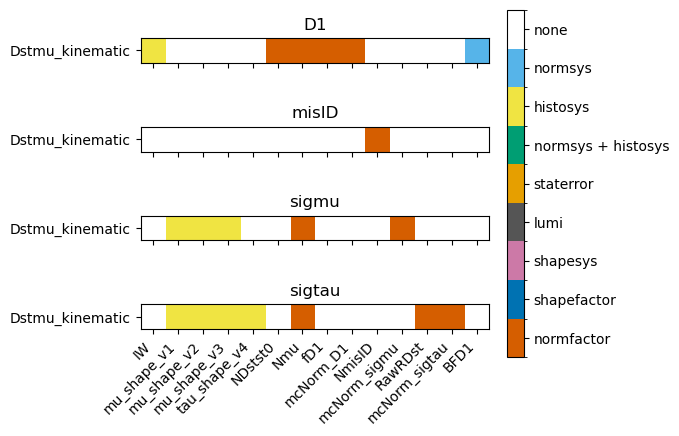

In [13]:
# Check the workspace by using cabinetry
model, data = cabinetry.model_utils.model_and_data(workspace)
cabinetry.visualize.modifier_grid(model, split_by_sample=True, figure_folder="results-pyhf")

[02/13/25 08:59:11] INFO     Validating spec against schema: workspace.json                        ]8;id=738792;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py\workspace.py]8;;\:]8;id=546835;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py#312\312]8;;\

[02/13/25 08:59:12] INFO     Validating spec against schema: model.json                                  ]8;id=115182;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=575858;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#768\768]8;;\

                    INFO     adding modifier IW (1 new nuisance parameters)                              ]8;id=642525;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=678761;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v1 (1 new nuisance parameters)                     ]8;id=466571;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=359065;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v2 (1 new nuisance parameters)                     ]8;id=842649;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=393134;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v3 (1 new nuisance parameters)                     ]8;id=172096;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=351829;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier tau_shape_v4 (1 new nuisance parameters)                    ]8;id=11304;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=599649;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NDstst0 (1 new nuisance parameters)                         ]8;id=341872;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=928368;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier Nmu (1 new nuisance parameters)                             ]8;id=919452;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=925615;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier fD1 (1 new nuisance parameters)                             ]8;id=486241;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=852376;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_D1 (1 new nuisance parameters)                       ]8;id=218965;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=561383;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NmisID (1 new nuisance parameters)                          ]8;id=954498;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=823831;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigmu (1 new nuisance parameters)                    ]8;id=126695;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=913524;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier RawRDst (1 new nuisance parameters)                         ]8;id=512128;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=469207;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigtau (1 new nuisance parameters)                   ]8;id=411763;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=855766;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier BFD1 (1 new nuisance parameters)                            ]8;id=680241;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=150461;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     performing maximum likelihood fit                                      ]8;id=594468;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=343973;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#478\478]8;;\

[02/13/25 08:59:14] INFO     Migrad status:                                                         ]8;id=326379;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=827514;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#108\108]8;;\
                             ┌─────────────────────────────────────────────────────────────────────                
                             ────┐                                                                                 
                             │                                Migrad                                               
                             │                                                                                     
                             ├──────────────────────────────────┬──────────────────────────────────                
                             ────┤                                                                                 
                             │ FCN = 8544                       │              Nfcn = 398                          
                             │                                                                                     
                             │ EDM = 4.48e-05 (Goal: 0.0002)    │                                                  
                             │                                                                                     
                             ├──────────────────────────────────┼──────────────────────────────────                
                             ────┤                                                                                 
                             │          Valid Minimum           │   Below EDM threshold (goal x 10)                
                             │                                                                                     
                             ├──────────────────────────────────┼──────────────────────────────────                
                             ────┤                                                                                 
                             │      No parameters at limit      │           Below call limit                       
                             │                                                                                     
                             ├──────────────────────────────────┼──────────────────────────────────                
                             ────┤                                                                                 
                             │             Hesse ok             │         Covariance accurate                      
                             │                                                                                     
                             └──────────────────────────────────┴──────────────────────────────────                
                             ────┘                                                                                 

                    INFO     fit results (with symmetric uncertainties):                             ]8;id=811544;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=58638;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#35\35]8;;\

                    INFO     IW            = -0.2654 +/- 0.1509                                      ]8;id=924666;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=473132;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     mu_shape_v1   =  0.8571 +/- 0.7566                                      ]8;id=377609;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=591223;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     mu_shape_v2   =  0.3382 +/- 0.9136                                      ]8;id=885201;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=478756;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     mu_shape_v3   =  0.2700 +/- 0.8552                                      ]8;id=668377;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=410564;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     tau_shape_v4  =  0.0274 +/- 1.3916                                      ]8;id=194943;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=902700;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     NDstst0       =  0.1020 +/- 0.0000  (constant)                          ]8;id=182813;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=537648;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     Nmu           =  63653.8804 +/- 399.4108                                ]8;id=104221;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=264545;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     fD1           =  3.2000 +/- 0.0000  (constant)                          ]8;id=15496;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=158741;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     mcNorm_D1     =  0.0001 +/- 0.0000  (constant)                          ]8;id=12127;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=742205;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     NmisID        =  1.0000 +/- 0.0000  (constant)                          ]8;id=984735;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=29917;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     mcNorm_sigmu  =  0.0000 +/- 0.0000  (constant)                          ]8;id=255345;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=316149;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     RawRDst       =  0.0349 +/- 0.0029                                      ]8;id=286726;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=395588;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     mcNorm_sigtau =  0.0001 +/- 0.0000  (constant)                          ]8;id=241391;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=449510;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     BFD1          = -1.4774 +/- 0.2593                                      ]8;id=744050;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=440192;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

FitResults(
    bestfit=array([-2.65359895e-01,  8.57121347e-01,  3.38159878e-01,  2.69987176e-01,
        2.74490635e-02,  1.02000000e-01,  6.36538804e+04,  3.20000000e+00,
        1.12256124e-04,  1.00000000e+00,  3.17460317e-06,  3.49150982e-02,
        9.25954658e-05, -1.47739223e+00]),
    uncertainty=array([1.50941711e-01, 7.56639947e-01, 9.13607681e-01, 8.55174433e-01,
       1.39159390e+00, 0.00000000e+00, 3.99410802e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.89134487e-03,
       0.00000000e+00, 2.59330132e-01]),
    labels=[
        'IW',
        'mu_shape_v1',
        'mu_shape_v2',
        'mu_shape_v3',
        'tau_shape_v4',
        'NDstst0',
        'Nmu',
        'fD1',
        'mcNorm_D1',
        'NmisID',
        'mcNorm_sigmu',
        'RawRDst',
        'mcNorm_sigtau',
        'BFD1'
    ],
    corr_mat=array([[ 1.00000000e+00, -1.79559966e-01,  3.14377836e-02,
         3.50469819e-01, -2.51609271e-02,  0.00000000e+00,
        -5.75120932e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.29886343e-01,
         0.00000000e+00,  1.19443607e-01],
       [-1.79559966e-01,  1.00000000e+00, -1.13787408e-01,
         1.59801066e-02,  7.17674328e-03,  0.00000000e+00,
        -8.95827311e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.25952326e-01,
         0.00000000e+00,  1.11872484e-02],
       [ 3.14377836e-02, -1.13787408e-01,  1.00000000e+00,
         4.40356179e-02, -5.02654464e-04,  0.00000000e+00,
        -1.32442014e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.29126982e-02,
         0.00000000e+00,  1.55266548e-01],
       [ 3.50469819e-01,  1.59801066e-02,  4.40356179e-02,
         1.00000000e+00, -3.77828640e-03,  0.00000000e+00,
         3.95541615e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.15581444e-02,
         0.00000000e+00, -3.98402241e-02],
       [-2.51609271e-02,  7.17674328e-03, -5.02654464e-04,
        -3.77828640e-03,  1.00000000e+00,  0.00000000e+00,
         5.42082731e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  3.86286128e-02,
         0.00000000e+00, -2.00503858e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-5.75120932e-02, -8.95827311e-02, -1.32442014e-01,
         3.95541615e-02,  5.42082731e-03,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.17857307e-01,
         0.00000000e+00, -7.84838758e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.29886343e-01,  2.25952326e-01, -3.29126982e-02,

IW: -0.2654 ± 0.1509

mu_shape_v1: 0.8571 ± 0.7566

mu_shape_v2: 0.3382 ± 0.9136

mu_shape_v3: 0.2700 ± 0.8552

tau_shape_v4: 0.0274 ± 1.3916

NDstst0: 0.1020 ± 0.0000

Nmu: 63653.8804 ± 399.4108

fD1: 3.2000 ± 0.0000

mcNorm_D1: 0.0001 ± 0.0000

NmisID: 1.0000 ± 0.0000

mcNorm_sigmu: 0.0000 ± 0.0000

RawRDst: 0.0349 ± 0.0029

mcNorm_sigtau: 0.0001 ± 0.0000

BFD1: -1.4774 ± 0.2593

                    INFO     Validating spec against schema: workspace.json                        ]8;id=442094;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py\workspace.py]8;;\:]8;id=102936;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py#312\312]8;;\

[02/13/25 08:59:15] INFO     Validating spec against schema: model.json                                  ]8;id=209044;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=858544;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#768\768]8;;\

                    INFO     adding modifier IW (1 new nuisance parameters)                              ]8;id=65558;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=547987;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v1 (1 new nuisance parameters)                     ]8;id=430405;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=193555;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v2 (1 new nuisance parameters)                     ]8;id=424912;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=577271;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v3 (1 new nuisance parameters)                     ]8;id=96309;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=810542;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier tau_shape_v4 (1 new nuisance parameters)                    ]8;id=80067;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=139674;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NDstst0 (1 new nuisance parameters)                         ]8;id=776197;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=344554;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier Nmu (1 new nuisance parameters)                             ]8;id=23808;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=950537;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier fD1 (1 new nuisance parameters)                             ]8;id=885905;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=569807;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_D1 (1 new nuisance parameters)                       ]8;id=467624;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=868342;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NmisID (1 new nuisance parameters)                          ]8;id=461006;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=397090;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigmu (1 new nuisance parameters)                    ]8;id=392499;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=389737;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier RawRDst (1 new nuisance parameters)                         ]8;id=974433;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=401358;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigtau (1 new nuisance parameters)                   ]8;id=42021;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=437355;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier BFD1 (1 new nuisance parameters)                            ]8;id=444924;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=470147;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     saving figure as                                                           ]8;id=183593;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=666920;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/correlation_matrix.pdf                                                         

[02/13/25 08:59:16] INFO     saving figure as                                                           ]8;id=160669;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=549917;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/pulls.pdf                                                                      

[02/13/25 08:59:17] INFO     saving figure as                                                           ]8;id=905356;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=359104;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/bin_0/Dstmu_kinematic_prefit_log.pdf              

                    INFO     saving figure as                                                           ]8;id=564900;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=761653;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/bin_0/Dstmu_kinematic_prefit.pdf                  

                    INFO     saving figure as                                                           ]8;id=600489;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=988138;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/bin_1/Dstmu_kinematic_prefit_log.pdf              

[02/13/25 08:59:18] INFO     saving figure as                                                           ]8;id=939864;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=238858;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/bin_1/Dstmu_kinematic_prefit.pdf                  

                    INFO     saving figure as                                                           ]8;id=699510;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=628988;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/projection_axis_0/Dstmu_kinematic_pref            
                             it_log.pdf                                                                            

[02/13/25 08:59:19] INFO     saving figure as                                                           ]8;id=445436;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=923528;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/projection_axis_0/Dstmu_kinematic_pref            
                             it.pdf                                                                                

[02/13/25 08:59:20] INFO     saving figure as                                                           ]8;id=703420;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=591132;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/projection_axis_1/Dstmu_kinematic_pref            
                             it_log.pdf                                                                            

[02/13/25 08:59:21] INFO     saving figure as                                                           ]8;id=918357;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=804790;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/projection_axis_1/Dstmu_kinematic_pref            
                             it.pdf                                                                                

                    INFO     saving figure as                                                           ]8;id=44000;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=170236;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/projection_axis_2/Dstmu_kinematic_pref            
                             it_log.pdf                                                                            

[02/13/25 08:59:22] INFO     saving figure as                                                           ]8;id=484281;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=380926;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/projection_axis_2/Dstmu_kinematic_pref            
                             it.pdf                                                                                

[02/13/25 08:59:23] INFO     saving figure as                                                           ]8;id=595966;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=724841;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/postfit/projection_axis_0/Dstmu_kinematic_pos            
                             tfit_log.pdf                                                                          

[02/13/25 08:59:24] INFO     saving figure as                                                           ]8;id=698470;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=764671;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/postfit/projection_axis_0/Dstmu_kinematic_pos            
                             tfit.pdf                                                                              

                    INFO     saving figure as                                                           ]8;id=549577;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=346075;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/postfit/projection_axis_1/Dstmu_kinematic_pos            
                             tfit_log.pdf                                                                          

[02/13/25 08:59:25] INFO     saving figure as                                                           ]8;id=3295;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=819663;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/postfit/projection_axis_1/Dstmu_kinematic_pos            
                             tfit.pdf                                                                              

[02/13/25 08:59:26] INFO     saving figure as                                                           ]8;id=944893;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=752353;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/postfit/projection_axis_2/Dstmu_kinematic_pos            
                             tfit_log.pdf                                                                          

                    INFO     saving figure as                                                           ]8;id=778824;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=627122;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/postfit/projection_axis_2/Dstmu_kinematic_pos            
                             tfit.pdf                                                                              

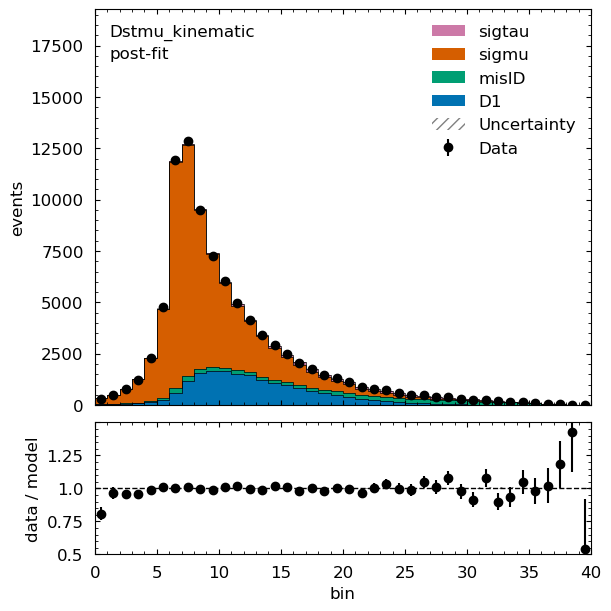

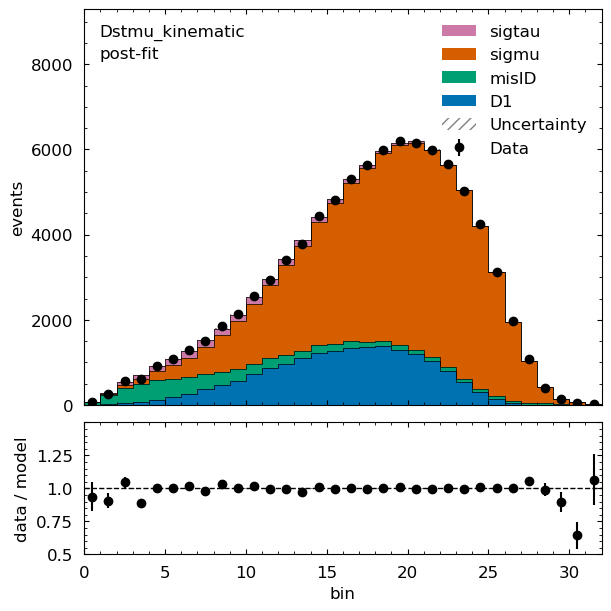

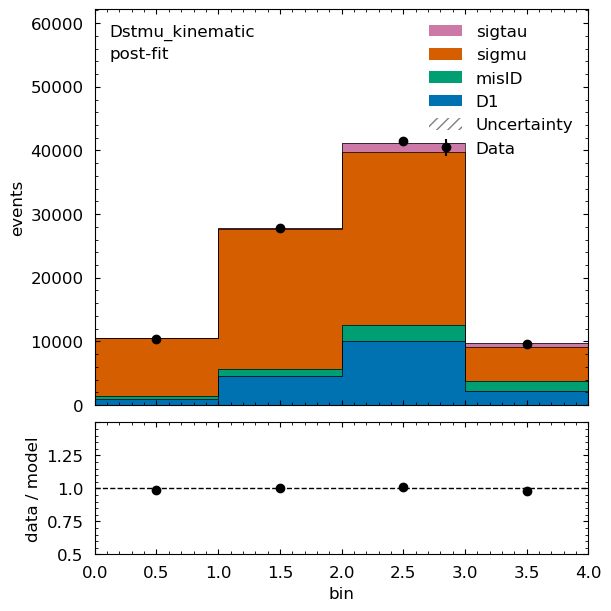

In [14]:
# Perform fit if requested
result = None
if config.doFit:
    result = perform_fit(workspace)

    if result is not None:

        # Generate plots
        visualise_fit_results(result, workspace, "results-pyhf")
        # generate_plots(workspace, result, config)
        pass
    else:
        print("Fit failed.")

# 2. Create the pyhf workspace by using cabinetry

In [15]:
# Create cabinetry configuration

# Calculate MC normalizations
mc_norm_sigmu: float = 1.0 / np.sum(histograms["sigmu"])
mc_norm_sigtau: float = 1.0 / np.sum(histograms["sigtau"])
mc_norm_D1: float = 1.0 / np.sum(histograms["D1"])
# mc_norm_misID: float = 1.0 / np.sum(histograms["misID"])

config_cabinetry = {
    "General": {
        "Measurement": "RD-analysis",

        "InputPath": "input/DemoHistos_flattened.root:{SamplePath}{VariationPath}",
        "VariationPath": "",  # No variation path needed for base histograms

        "HistogramFolder": "histograms/",
        "POI": "RawRDst",
        "Fixed": [
            {"Name": "NDstst0", "Value": 0.102},
            {"Name": "fD1", "Value": 3.2},
            {"Name": "NmisID", "Value": 1.0},
            # Normalization factors to normalize the data to 1
            {"Name": "mcNorm_sigmu", "Value": mc_norm_sigmu},
            {"Name": "mcNorm_sigtau", "Value": mc_norm_sigtau},
            {"Name": "mcNorm_D1", "Value": mc_norm_D1},
            # {"Name": "mcNorm_misID", "Value": mc_norm_misID},
        ],
    },
    "Regions": [
        {
            "Name": "Dstmu_kinematic",
            # "RegionPath": "",  # Not needed since all histograms are in same file
            "Variable": "Discriminant",
        }
    ],
    "Samples": [
        {
            "Name": "sigmu",
            "SamplePath": "h_sigmu",
            "Data": False,
            "DisableStaterror": True,
        },
        {
            "Name": "sigtau",
            "SamplePath": "h_sigtau",
            "Data": False,
            "DisableStaterror": True,
        },
        {
            "Name": "D1",
            "SamplePath": "h_D1",
            "Data": False,
            "DisableStaterror": True,
        },
        {
            "Name": "misID",
            "SamplePath": "h_misID",
            "Data": False,
            "DisableStaterror": True,
        },
        {
            "Name": "data",
            "SamplePath": "h_data",
            "Data": True,
        }
    ],
    "NormFactors": [
        {
            "Name": "mcNorm_sigmu",
            "Samples": "sigmu",
            "Nominal": mc_norm_sigmu,
        },
        {
            "Name": "mcNorm_sigtau", 
            "Samples": "sigtau",
            "Nominal": mc_norm_sigtau,
        },
        {
            "Name": "mcNorm_D1",
            "Samples": "D1",
            "Nominal": mc_norm_D1,
        },
        # {
        #     "Name": "mcNorm_misID",
        #     "Samples": "misID",
        #     "Nominal": mc_norm_misID,
        # },

        {
            "Name": "Nmu",
            "Samples": ["sigmu", "sigtau", "D1"],
            "Nominal": config.expMu,
            "Bounds": [1e-6, 1e6],
        },
        {
            "Name": "RawRDst",
            "Samples": "sigtau",
            "Nominal": config.expTau,
            "Bounds": [1e-6, 0.2],
        },
        {
            "Name": "NDstst0",
            "Samples": "D1",
            "Nominal": 0.102,
        },
        {
            "Name": "fD1",
            "Samples": "D1", 
            "Nominal": 3.2,
        },
        {
            "Name": "NmisID",
            "Samples": "misID",
            "Nominal": 1.0,
        }
    ],
    "Systematics": [
        # Mu shape uncertainties
        {
            "Name": "syst_mu_shape_v1",
            "Type": "NormPlusShape",
            "Samples": "sigmu",
            "Up": {"VariationPath": "_v1p"},
            "Down": {"VariationPath": "_v1m"},
            "ModifierName": "mu_shape_v1",
        },
        {
            "Name": "syst_mu_shape_v2",
            "Type": "NormPlusShape", 
            "Samples": "sigmu",
            "Up": {"VariationPath": "_v2p"},
            "Down": {"VariationPath": "_v2m"},
            "ModifierName": "mu_shape_v2",
        },
        {
            "Name": "syst_mu_shape_v3",
            "Type": "NormPlusShape",
            "Samples": "sigmu",
            "Up": {"VariationPath": "_v3p"},
            "Down": {"VariationPath": "_v3m"},
            "ModifierName": "mu_shape_v3",
        },
        # Tau shape uncertainties 
        {
            "Name": "syst_tau_shape_v1",
            "Type": "NormPlusShape",
            "Samples": "sigtau",
            "Up": {"VariationPath": "_v1p"},
            "Down": {"VariationPath": "_v1m"},
            "ModifierName": "mu_shape_v1",
        },
        {
            "Name": "syst_tau_shape_v2",
            "Type": "NormPlusShape",
            "Samples": "sigtau",
            "Up": {"VariationPath": "_v2p"},
            "Down": {"VariationPath": "_v2m"},
            "ModifierName": "mu_shape_v2",
        },
        {
            "Name": "syst_tau_shape_v3",
            "Type": "NormPlusShape",
            "Samples": "sigtau",
            "Up": {"VariationPath": "_v3p"},
            "Down": {"VariationPath": "_v3m"},
            "ModifierName": "mu_shape_v3",
        },
        {
            "Name": "syst_tau_shape_v4",
            "Type": "NormPlusShape",
            "Samples": "sigtau",
            "Up": {"VariationPath": "_v4p"},
            "Down": {"VariationPath": "_v4m"},
            "ModifierName": "tau_shape_v4",
        },
        # D1 shape uncertainty
        {
            "Name": "syst_IW",
            "Type": "NormPlusShape",
            "Samples": "D1",
            "Up": {"VariationPath": "IWp"},
            "Down": {"VariationPath": "IWm"},
            "ModifierName": "IW",
        },
        # BF uncertainty for D1
        {
            "Name": "syst_BFD1",
            "Type": "Normalization",
            "Up": {"Normalization": 0.1},
            "Down": {"Normalization": -0.1},
            "Samples": "D1",
            "ModifierName": "BFD1",
        }
    ],

}



In [16]:
config_cabinetry

{'General': {'Measurement': 'RD-analysis',
  'InputPath': 'input/DemoHistos_flattened.root:{SamplePath}{VariationPath}',
  'VariationPath': '',
  'HistogramFolder': 'histograms/',
  'POI': 'RawRDst',
  'Fixed': [{'Name': 'NDstst0', 'Value': 0.102},
   {'Name': 'fD1', 'Value': 3.2},
   {'Name': 'NmisID', 'Value': 1.0},
   {'Name': 'mcNorm_sigmu', 'Value': np.float64(3.1746031745664774e-06)},
   {'Name': 'mcNorm_sigtau', 'Value': np.float64(9.259546579578162e-05)},
   {'Name': 'mcNorm_D1', 'Value': np.float64(0.00011225612352294966)}]},
 'Regions': [{'Name': 'Dstmu_kinematic', 'Variable': 'Discriminant'}],
 'Samples': [{'Name': 'sigmu',
   'SamplePath': 'h_sigmu',
   'Data': False,
   'DisableStaterror': True},
  {'Name': 'sigtau',
   'SamplePath': 'h_sigtau',
   'Data': False,
   'DisableStaterror': True},
  {'Name': 'D1',
   'SamplePath': 'h_D1',
   'Data': False,
   'DisableStaterror': True},
  {'Name': 'misID',
   'SamplePath': 'h_misID',
   'Data': False,
   'DisableStaterror': True

In [17]:
# validate the config
cabinetry.configuration.validate(config_cabinetry)



True

In [18]:
# print the overview of the configuration
cabinetry.configuration.print_overview(config_cabinetry)

[02/13/25 09:00:08] INFO     the config contains:                                               ]8;id=56881;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/configuration.py\configuration.py]8;;\:]8;id=405131;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/configuration.py#92\92]8;;\

                    INFO       5 Sample(s)                                                      ]8;id=447345;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/configuration.py\configuration.py]8;;\:]8;id=297419;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/configuration.py#93\93]8;;\

                    INFO       1 Regions(s)                                                     ]8;id=658803;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/configuration.py\configuration.py]8;;\:]8;id=636490;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/configuration.py#94\94]8;;\

                    INFO       8 NormFactor(s)                                                  ]8;id=790951;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/configuration.py\configuration.py]8;;\:]8;id=700739;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/configuration.py#95\95]8;;\

                    INFO       9 Systematic(s)                                                  ]8;id=147302;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/configuration.py\configuration.py]8;;\:]8;id=787735;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/configuration.py#97\97]8;;\

In [ ]:
# collect the histograms
cabinetry.templates.collect(config_cabinetry, method="uproot")

[02/13/25 09:00:12] WARNING  Dstmu_kinematic_sigmu_syst_mu_shape_v1_Up has empty bins: [   0    1    2 ]8;id=936081;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=483952;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             ... 5117 5118 5119]                                                                   

                    WARNING  Dstmu_kinematic_sigmu_syst_mu_shape_v1_Down has empty bins: [   0    1    ]8;id=396224;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=157169;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             2 ... 5117 5118 5119]                                                                 

                    WARNING  Dstmu_kinematic_sigmu_syst_mu_shape_v2_Up has empty bins: [   0    1    2 ]8;id=146587;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=622749;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             ... 5117 5118 5119]                                                                   

                    WARNING  Dstmu_kinematic_sigmu_syst_mu_shape_v2_Down has empty bins: [   0    1    ]8;id=650708;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=262861;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             2 ... 5117 5118 5119]                                                                 

                    WARNING  Dstmu_kinematic_sigmu_syst_mu_shape_v3_Up has empty bins: [   0    1    2 ]8;id=447927;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=984685;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             ... 5117 5118 5119]                                                                   

                    WARNING  Dstmu_kinematic_sigmu_syst_mu_shape_v3_Down has empty bins: [   0    1    ]8;id=217604;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=273724;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             2 ... 5117 5118 5119]                                                                 

                    WARNING  Dstmu_kinematic_sigtau_syst_tau_shape_v1_Up has empty bins: [   0    1    ]8;id=777428;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=169681;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             2 ... 5117 5118 5119]                                                                 

                    WARNING  Dstmu_kinematic_sigtau_syst_tau_shape_v1_Down has empty bins: [   0    1  ]8;id=499288;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=996313;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             2 ... 5117 5118 5119]                                                                 

                    WARNING  Dstmu_kinematic_sigtau_syst_tau_shape_v2_Up has empty bins: [   0    1    ]8;id=268846;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=334201;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             2 ... 5117 5118 5119]                                                                 

                    WARNING  Dstmu_kinematic_sigtau_syst_tau_shape_v2_Down has empty bins: [   0    1  ]8;id=56957;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=879286;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             2 ... 5117 5118 5119]                                                                 

                    WARNING  Dstmu_kinematic_sigtau_syst_tau_shape_v3_Up has empty bins: [   0    1    ]8;id=498384;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=879970;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             2 ... 5117 5118 5119]                                                                 

                    WARNING  Dstmu_kinematic_sigtau_syst_tau_shape_v3_Down has empty bins: [   0    1  ]8;id=859885;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=93256;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             2 ... 5117 5118 5119]                                                                 

                    WARNING  Dstmu_kinematic_sigtau_syst_tau_shape_v4_Up has empty bins: [   0    1    ]8;id=906321;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=505552;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             2 ... 5117 5118 5119]                                                                 

                    WARNING  Dstmu_kinematic_sigtau_syst_tau_shape_v4_Down has empty bins: [   0    1  ]8;id=225840;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=409485;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             2 ... 5117 5118 5119]                                                                 

                    WARNING  Dstmu_kinematic_D1_syst_IW_Up has empty bins: [   0    1    2 ... 5117    ]8;id=916996;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=327330;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             5118 5119]                                                                            

                    WARNING  Dstmu_kinematic_D1_syst_IW_Down has empty bins: [   0    1    2 ... 5117  ]8;id=987086;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=873695;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\
                             5118 5119]                                                                            

                    WARNING  Dstmu_kinematic_data has empty bins: [   0    1    2 ... 5117 5118 5119]  ]8;id=888461;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=734000;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#206\206]8;;\

[02/13/25 09:04:45] INFO     visualizing histogram                                                   ]8;id=907344;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/__init__.py\__init__.py]8;;\:]8;id=520807;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/__init__.py#92\92]8;;\

                    INFO     no modified histogram histograms/Dstmu_kinematic_data_modified.npz found,  ]8;id=295729;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=20021;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             loading un-modified histogram                                                         

                    INFO     no modified histogram histograms/Dstmu_kinematic_misID_modified.npz found, ]8;id=58565;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=260481;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             loading un-modified histogram                                                         

                    INFO     no modified histogram histograms/Dstmu_kinematic_D1_modified.npz found,    ]8;id=975806;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=241960;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             loading un-modified histogram                                                         

                    INFO     no modified histogram histograms/Dstmu_kinematic_sigtau_modified.npz       ]8;id=377265;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=680368;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             found, loading un-modified histogram                                                  

                    INFO     no modified histogram histograms/Dstmu_kinematic_sigmu_modified.npz found, ]8;id=346824;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=442960;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             loading un-modified histogram                                                         

[02/13/25 09:05:04] INFO     saving figure as figures/Dstmu_kinematic_prefit_log.pdf                    ]8;id=125753;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=868970;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\

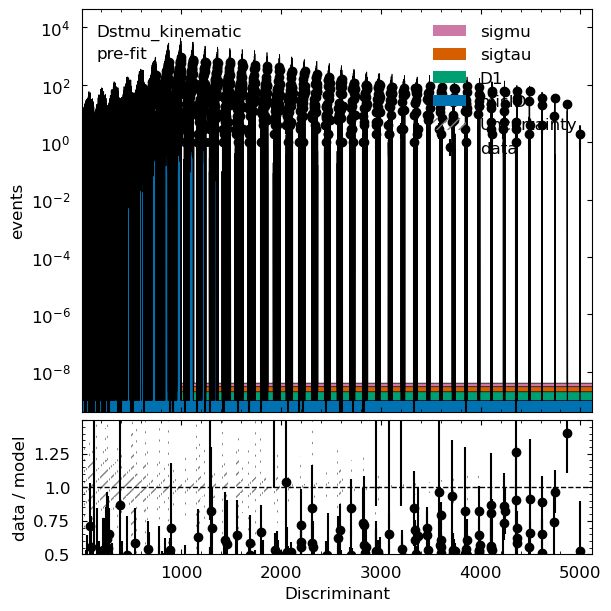

In [20]:
# visualize the data and mc before fitting
figs_dict = cabinetry.visualize.data_mc_from_histograms(config_cabinetry)


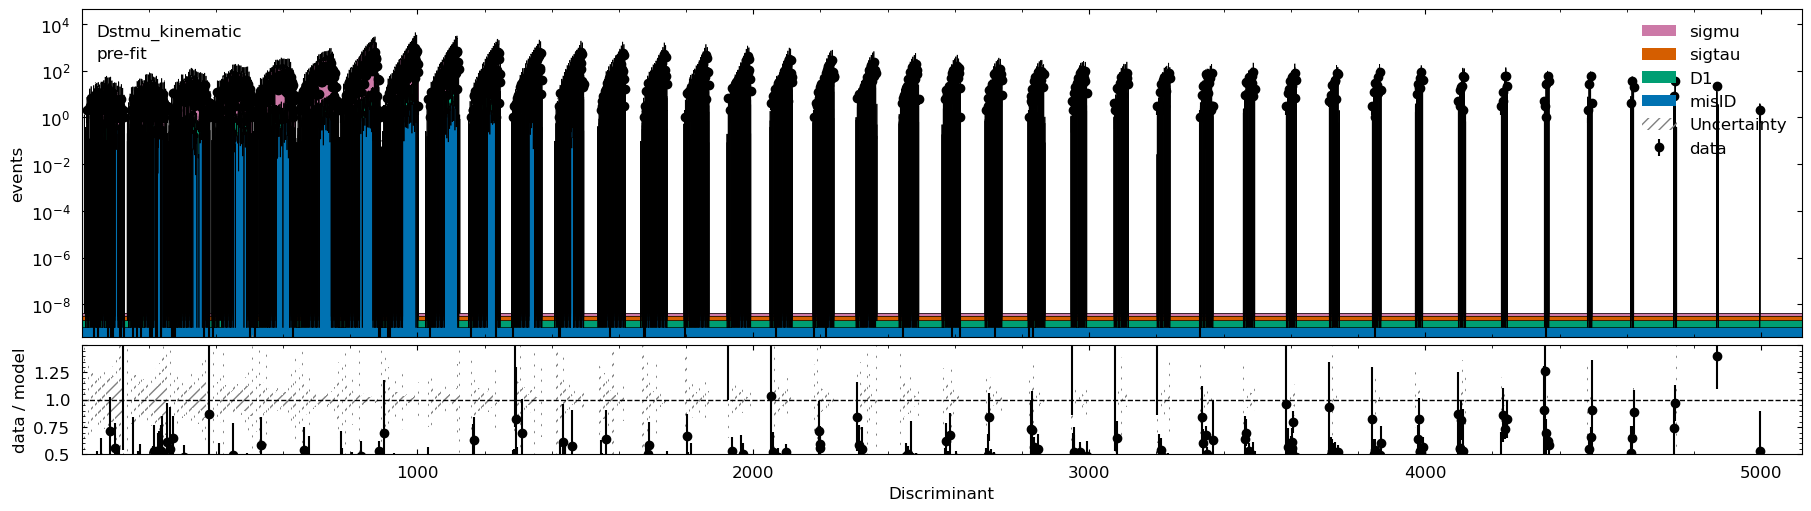

In [21]:
# make the figure wider
from IPython.display import display

fig = figs_dict[0]['figure']

fig.set_figwidth(18)
fig.set_figheight(5)
display(fig)

In [22]:
# build the workspace by using cabinetry and save it to a json file
workspace_path = "output/workspace.json"
spec = cabinetry.workspace.build(config_cabinetry)
cabinetry.workspace.save(spec, workspace_path)

[02/13/25 09:06:35] INFO     building workspace                                                    ]8;id=351396;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/workspace.py\workspace.py]8;;\:]8;id=147085;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/workspace.py#430\430]8;;\

                    INFO     no modified histogram histograms/Dstmu_kinematic_sigmu_modified.npz found, ]8;id=191058;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=962761;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             loading un-modified histogram                                                         

                    INFO     no modified histogram                                                      ]8;id=929032;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=731525;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigmu_syst_mu_shape_v1_Up_modified.npz found,              
                             loading un-modified histogram                                                         

                    INFO     no modified histogram histograms/Dstmu_kinematic_sigmu_modified.npz found, ]8;id=275459;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=721990;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             loading un-modified histogram                                                         

                    INFO     no modified histogram                                                      ]8;id=514186;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=655642;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigmu_syst_mu_shape_v1_Down_modified.npz found,            
                             loading un-modified histogram                                                         

                    INFO     no modified histogram                                                      ]8;id=203028;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=735172;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigmu_syst_mu_shape_v2_Up_modified.npz found,              
                             loading un-modified histogram                                                         

                    INFO     no modified histogram histograms/Dstmu_kinematic_sigmu_modified.npz found, ]8;id=593445;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=385951;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             loading un-modified histogram                                                         

                    INFO     no modified histogram                                                      ]8;id=359483;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=102684;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigmu_syst_mu_shape_v2_Down_modified.npz found,            
                             loading un-modified histogram                                                         

                    INFO     no modified histogram                                                      ]8;id=434678;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=616907;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigmu_syst_mu_shape_v3_Up_modified.npz found,              
                             loading un-modified histogram                                                         

                    INFO     no modified histogram histograms/Dstmu_kinematic_sigmu_modified.npz found, ]8;id=837191;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=574019;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             loading un-modified histogram                                                         

                    INFO     no modified histogram                                                      ]8;id=511136;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=520254;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigmu_syst_mu_shape_v3_Down_modified.npz found,            
                             loading un-modified histogram                                                         

                    INFO     no modified histogram histograms/Dstmu_kinematic_sigtau_modified.npz       ]8;id=838140;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=165130;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             found, loading un-modified histogram                                                  

                    INFO     no modified histogram                                                      ]8;id=889119;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=552772;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigtau_syst_tau_shape_v1_Up_modified.npz found,            
                             loading un-modified histogram                                                         

                    INFO     no modified histogram histograms/Dstmu_kinematic_sigtau_modified.npz       ]8;id=689497;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=177609;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             found, loading un-modified histogram                                                  

                    INFO     no modified histogram                                                      ]8;id=459317;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=765421;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigtau_syst_tau_shape_v1_Down_modified.npz                 
                             found, loading un-modified histogram                                                  

                    INFO     no modified histogram                                                      ]8;id=554919;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=590182;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigtau_syst_tau_shape_v2_Up_modified.npz found,            
                             loading un-modified histogram                                                         

                    INFO     no modified histogram histograms/Dstmu_kinematic_sigtau_modified.npz       ]8;id=868727;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=950332;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             found, loading un-modified histogram                                                  

                    INFO     no modified histogram                                                      ]8;id=836386;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=637231;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigtau_syst_tau_shape_v2_Down_modified.npz                 
                             found, loading un-modified histogram                                                  

                    INFO     no modified histogram                                                      ]8;id=680080;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=39736;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigtau_syst_tau_shape_v3_Up_modified.npz found,            
                             loading un-modified histogram                                                         

                    INFO     no modified histogram histograms/Dstmu_kinematic_sigtau_modified.npz       ]8;id=576413;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=472338;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             found, loading un-modified histogram                                                  

                    INFO     no modified histogram                                                      ]8;id=802281;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=237162;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigtau_syst_tau_shape_v3_Down_modified.npz                 
                             found, loading un-modified histogram                                                  

                    INFO     no modified histogram                                                      ]8;id=45136;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=132356;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigtau_syst_tau_shape_v4_Up_modified.npz found,            
                             loading un-modified histogram                                                         

                    INFO     no modified histogram histograms/Dstmu_kinematic_sigtau_modified.npz       ]8;id=892018;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=783168;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             found, loading un-modified histogram                                                  

                    INFO     no modified histogram                                                      ]8;id=821776;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=583500;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_sigtau_syst_tau_shape_v4_Down_modified.npz                 
                             found, loading un-modified histogram                                                  

                    INFO     no modified histogram histograms/Dstmu_kinematic_D1_modified.npz found,    ]8;id=569833;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=719713;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             loading un-modified histogram                                                         

                    INFO     no modified histogram                                                      ]8;id=597830;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=722499;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_D1_syst_IW_Up_modified.npz found, loading                  
                             un-modified histogram                                                                 

                    INFO     no modified histogram histograms/Dstmu_kinematic_D1_modified.npz found,    ]8;id=173578;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=228162;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             loading un-modified histogram                                                         

                    INFO     no modified histogram                                                      ]8;id=286663;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=786546;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             histograms/Dstmu_kinematic_D1_syst_IW_Down_modified.npz found, loading                
                             un-modified histogram                                                                 

                    INFO     no modified histogram histograms/Dstmu_kinematic_misID_modified.npz found, ]8;id=238590;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=334527;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             loading un-modified histogram                                                         

                    INFO     no modified histogram histograms/Dstmu_kinematic_data_modified.npz found,  ]8;id=687888;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py\histo.py]8;;\:]8;id=122707;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/histo.py#82\82]8;;\
                             loading un-modified histogram                                                         

                    INFO     Validating spec against schema: workspace.json                        ]8;id=349926;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py\workspace.py]8;;\:]8;id=281125;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py#312\312]8;;\

In [23]:
# print the workspace
print(json.dumps(spec, sort_keys=True, indent=4))

{
    "channels": [
        {
            "name": "Dstmu_kinematic",
            "samples": [
                {
                    "data": [
                        1e-09,
                        1e-09,
                        1e-09,
                        1e-09,
                        1e-09,
                        1e-09,
                        1e-09,
                        1e-09,
                        1.2545788789384877,
                        1e-09,
                        1e-09,
                        1e-09,
                        1e-09,
                        1e-09,
                        1e-09,
                        1e-09,
                        6.647566198565609,
                        1e-09,
                        1e-09,
                        1e-09,
                        7.999529559143212,
                        1e-09,
                        1e-09,
                        1e-09,
                        16.65463062952089,
                        1.77496937

[02/13/25 09:06:39] INFO     Validating spec against schema: workspace.json                        ]8;id=52747;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py\workspace.py]8;;\:]8;id=310170;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py#312\312]8;;\

                    INFO     Validating spec against schema: model.json                                  ]8;id=269475;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=290995;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#768\768]8;;\

[02/13/25 09:06:40] INFO     adding modifier IW (1 new nuisance parameters)                              ]8;id=927125;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=764463;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v1 (1 new nuisance parameters)                     ]8;id=289239;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=154136;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v2 (1 new nuisance parameters)                     ]8;id=525628;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=421756;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v3 (1 new nuisance parameters)                     ]8;id=582373;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=804701;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier tau_shape_v4 (1 new nuisance parameters)                    ]8;id=342014;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=270434;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NDstst0 (1 new nuisance parameters)                         ]8;id=200351;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=615405;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier Nmu (1 new nuisance parameters)                             ]8;id=629281;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=488806;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier fD1 (1 new nuisance parameters)                             ]8;id=341517;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=233686;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_D1 (1 new nuisance parameters)                       ]8;id=98211;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=437763;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NmisID (1 new nuisance parameters)                          ]8;id=837647;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=363780;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigmu (1 new nuisance parameters)                    ]8;id=678172;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=89677;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier RawRDst (1 new nuisance parameters)                         ]8;id=627065;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=331839;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigtau (1 new nuisance parameters)                   ]8;id=595667;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=636310;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier BFD1 (1 new nuisance parameters)                            ]8;id=164832;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=527969;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     saving figure as results-cabinetry/modifier_grid.pdf                       ]8;id=398247;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=993418;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\

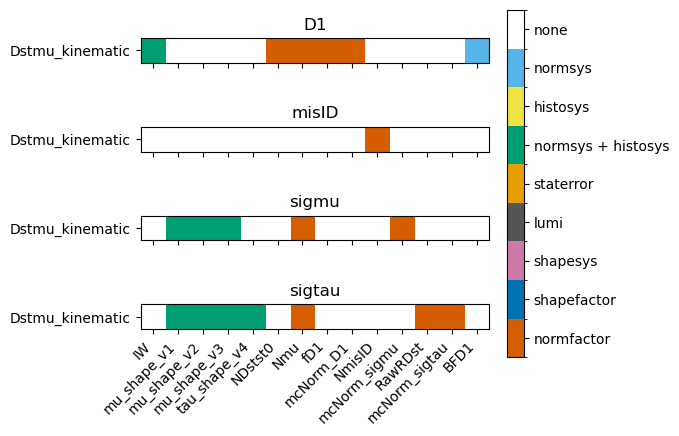

In [24]:
# visualize the modifier grid
cabinetry.visualize.modifier_grid(pyhf.Workspace(spec).model(), split_by_sample=True, figure_folder="results-cabinetry")

In [25]:
# load the workspace, the remaining steps are the same as the pyhf workspace
workspace = pyhf.Workspace(spec)

# Check the workspace by using cabinetry
model, data = cabinetry.model_utils.model_and_data(spec)

[02/13/25 09:06:42] INFO     Validating spec against schema: workspace.json                        ]8;id=818920;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py\workspace.py]8;;\:]8;id=305546;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py#312\312]8;;\

[02/13/25 09:06:43] INFO     Validating spec against schema: workspace.json                        ]8;id=469437;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py\workspace.py]8;;\:]8;id=28980;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py#312\312]8;;\

                    INFO     Validating spec against schema: model.json                                  ]8;id=796740;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=756472;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#768\768]8;;\

[02/13/25 09:06:44] INFO     adding modifier IW (1 new nuisance parameters)                              ]8;id=174511;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=368332;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v1 (1 new nuisance parameters)                     ]8;id=629272;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=335571;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v2 (1 new nuisance parameters)                     ]8;id=479760;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=472230;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v3 (1 new nuisance parameters)                     ]8;id=839804;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=564952;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier tau_shape_v4 (1 new nuisance parameters)                    ]8;id=738207;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=921105;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NDstst0 (1 new nuisance parameters)                         ]8;id=120185;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=589341;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier Nmu (1 new nuisance parameters)                             ]8;id=318700;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=927429;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier fD1 (1 new nuisance parameters)                             ]8;id=585195;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=870381;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_D1 (1 new nuisance parameters)                       ]8;id=904756;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=953776;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NmisID (1 new nuisance parameters)                          ]8;id=111528;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=22299;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigmu (1 new nuisance parameters)                    ]8;id=252507;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=832181;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier RawRDst (1 new nuisance parameters)                         ]8;id=17539;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=236624;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigtau (1 new nuisance parameters)                   ]8;id=437690;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=928316;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier BFD1 (1 new nuisance parameters)                            ]8;id=400267;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=277579;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     Validating spec against schema: workspace.json                        ]8;id=520190;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py\workspace.py]8;;\:]8;id=116181;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py#312\312]8;;\

                    INFO     Validating spec against schema: model.json                                  ]8;id=972748;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=68054;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#768\768]8;;\

[02/13/25 09:06:45] INFO     adding modifier IW (1 new nuisance parameters)                              ]8;id=820610;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=794710;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v1 (1 new nuisance parameters)                     ]8;id=274015;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=807764;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v2 (1 new nuisance parameters)                     ]8;id=319014;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=642578;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v3 (1 new nuisance parameters)                     ]8;id=262003;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=776628;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier tau_shape_v4 (1 new nuisance parameters)                    ]8;id=860439;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=786720;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NDstst0 (1 new nuisance parameters)                         ]8;id=406418;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=603252;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier Nmu (1 new nuisance parameters)                             ]8;id=370505;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=487874;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier fD1 (1 new nuisance parameters)                             ]8;id=134821;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=612454;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_D1 (1 new nuisance parameters)                       ]8;id=567713;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=640893;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NmisID (1 new nuisance parameters)                          ]8;id=4816;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=246299;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigmu (1 new nuisance parameters)                    ]8;id=251179;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=54974;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier RawRDst (1 new nuisance parameters)                         ]8;id=638791;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=376008;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigtau (1 new nuisance parameters)                   ]8;id=209885;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=185121;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier BFD1 (1 new nuisance parameters)                            ]8;id=902754;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=462401;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     performing maximum likelihood fit                                      ]8;id=346414;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=197278;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#478\478]8;;\

[02/13/25 09:06:47] INFO     Migrad status:                                                         ]8;id=47645;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=836292;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#108\108]8;;\
                             ┌─────────────────────────────────────────────────────────────────────                
                             ────┐                                                                                 
                             │                                Migrad                                               
                             │                                                                                     
                             ├──────────────────────────────────┬──────────────────────────────────                
                             ────┤                                                                                 
                             │ FCN = 8544                       │              Nfcn = 381                          
                             │                                                                                     
                             │ EDM = 0.000192 (Goal: 0.0002)    │                                                  
                             │                                                                                     
                             ├──────────────────────────────────┼──────────────────────────────────                
                             ────┤                                                                                 
                             │          Valid Minimum           │   Below EDM threshold (goal x 10)                
                             │                                                                                     
                             ├──────────────────────────────────┼──────────────────────────────────                
                             ────┤                                                                                 
                             │      No parameters at limit      │           Below call limit                       
                             │                                                                                     
                             ├──────────────────────────────────┼──────────────────────────────────                
                             ────┤                                                                                 
                             │             Hesse ok             │         Covariance accurate                      
                             │                                                                                     
                             └──────────────────────────────────┴──────────────────────────────────                
                             ────┘                                                                                 

                    INFO     fit results (with symmetric uncertainties):                             ]8;id=510164;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=790720;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#35\35]8;;\

                    INFO     IW            = -0.2656 +/- 0.1509                                      ]8;id=687374;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=896242;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     mu_shape_v1   =  0.8549 +/- 0.7548                                      ]8;id=91818;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=434386;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     mu_shape_v2   =  0.3378 +/- 0.9094                                      ]8;id=656329;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=785973;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     mu_shape_v3   =  0.2696 +/- 0.8526                                      ]8;id=883680;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=235215;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     tau_shape_v4  =  0.0133 +/- 1.3947                                      ]8;id=130558;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=599404;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     NDstst0       =  0.1020 +/- 0.0000  (constant)                          ]8;id=644629;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=793396;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     Nmu           =  63655.8843 +/- 399.1663                                ]8;id=903536;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=861840;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     fD1           =  3.2000 +/- 0.0000  (constant)                          ]8;id=331849;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=847656;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     mcNorm_D1     =  0.0001 +/- 0.0000  (constant)                          ]8;id=617221;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=551314;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     NmisID        =  1.0000 +/- 0.0000  (constant)                          ]8;id=834135;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=358205;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     mcNorm_sigmu  =  0.0000 +/- 0.0000  (constant)                          ]8;id=680385;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=16625;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     RawRDst       =  0.0349 +/- 0.0029                                      ]8;id=109781;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=406810;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     mcNorm_sigtau =  0.0001 +/- 0.0000  (constant)                          ]8;id=464336;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=119587;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

                    INFO     BFD1          = -1.4777 +/- 0.2594                                      ]8;id=130811;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py\__init__.py]8;;\:]8;id=675286;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/fit/__init__.py#38\38]8;;\

FitResults(
    bestfit=array([-2.65645405e-01,  8.54888863e-01,  3.37763601e-01,  2.69567272e-01,
        1.32680360e-02,  1.02000000e-01,  6.36558843e+04,  3.20000000e+00,
        1.12256124e-04,  1.00000000e+00,  3.17460317e-06,  3.49118248e-02,
        9.25954658e-05, -1.47769641e+00]),
    uncertainty=array([1.50929320e-01, 7.54797206e-01, 9.09354800e-01, 8.52581261e-01,
       1.39471911e+00, 0.00000000e+00, 3.99166254e+02, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.88941135e-03,
       0.00000000e+00, 2.59381773e-01]),
    labels=[
        'IW',
        'mu_shape_v1',
        'mu_shape_v2',
        'mu_shape_v3',
        'tau_shape_v4',
        'NDstst0',
        'Nmu',
        'fD1',
        'mcNorm_D1',
        'NmisID',
        'mcNorm_sigmu',
        'RawRDst',
        'mcNorm_sigtau',
        'BFD1'
    ],
    corr_mat=array([[ 1.00000000e+00, -1.79436753e-01,  3.13588545e-02,
         3.50417719e-01, -1.71663757e-02,  0.00000000e+00,
        -5.72302657e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.29278013e-01,
         0.00000000e+00,  1.18983699e-01],
       [-1.79436753e-01,  1.00000000e+00, -1.13778824e-01,
         1.60152463e-02,  4.91096205e-03,  0.00000000e+00,
        -8.96528124e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.25907216e-01,
         0.00000000e+00,  1.12845475e-02],
       [ 3.13588545e-02, -1.13778824e-01,  1.00000000e+00,
         4.40513260e-02, -3.59337329e-04,  0.00000000e+00,
        -1.32276935e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -3.27755935e-02,
         0.00000000e+00,  1.55118344e-01],
       [ 3.50417719e-01,  1.60152463e-02,  4.40513260e-02,
         1.00000000e+00, -2.60021139e-03,  0.00000000e+00,
         3.95673896e-02,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00, -1.14808251e-02,
         0.00000000e+00, -3.99054717e-02],
       [-1.71663757e-02,  4.91096205e-03, -3.59337329e-04,
        -2.60021139e-03,  1.00000000e+00,  0.00000000e+00,
         3.84644923e-03,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  2.68958494e-02,
         0.00000000e+00, -1.40092656e-02],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-5.72302657e-02, -8.96528124e-02, -1.32276935e-01,
         3.95673896e-02,  3.84644923e-03,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.17190270e-01,
         0.00000000e+00, -7.84566861e-01],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [-1.29278013e-01,  2.25907216e-01, -3.27755935e-02,

IW: -0.2656 ± 0.1509

mu_shape_v1: 0.8549 ± 0.7548

mu_shape_v2: 0.3378 ± 0.9094

mu_shape_v3: 0.2696 ± 0.8526

tau_shape_v4: 0.0133 ± 1.3947

NDstst0: 0.1020 ± 0.0000

Nmu: 63655.8843 ± 399.1663

fD1: 3.2000 ± 0.0000

mcNorm_D1: 0.0001 ± 0.0000

NmisID: 1.0000 ± 0.0000

mcNorm_sigmu: 0.0000 ± 0.0000

RawRDst: 0.0349 ± 0.0029

mcNorm_sigtau: 0.0001 ± 0.0000

BFD1: -1.4777 ± 0.2594

[02/13/25 09:06:48] INFO     Validating spec against schema: workspace.json                        ]8;id=705988;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py\workspace.py]8;;\:]8;id=961637;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/workspace.py#312\312]8;;\

                    INFO     Validating spec against schema: model.json                                  ]8;id=735555;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=785220;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#768\768]8;;\

[02/13/25 09:06:49] INFO     adding modifier IW (1 new nuisance parameters)                              ]8;id=4486;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=14974;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v1 (1 new nuisance parameters)                     ]8;id=677948;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=823115;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v2 (1 new nuisance parameters)                     ]8;id=398982;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=829039;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mu_shape_v3 (1 new nuisance parameters)                     ]8;id=23845;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=408675;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier tau_shape_v4 (1 new nuisance parameters)                    ]8;id=364155;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=860946;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NDstst0 (1 new nuisance parameters)                         ]8;id=166082;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=851241;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier Nmu (1 new nuisance parameters)                             ]8;id=201861;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=482114;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier fD1 (1 new nuisance parameters)                             ]8;id=604521;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=73277;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_D1 (1 new nuisance parameters)                       ]8;id=460930;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=59656;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier NmisID (1 new nuisance parameters)                          ]8;id=599998;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=611649;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigmu (1 new nuisance parameters)                    ]8;id=810026;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=343170;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier RawRDst (1 new nuisance parameters)                         ]8;id=977645;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=802069;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier mcNorm_sigtau (1 new nuisance parameters)                   ]8;id=43390;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=702107;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     adding modifier BFD1 (1 new nuisance parameters)                            ]8;id=895509;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py\pdf.py]8;;\:]8;id=11424;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/pyhf/pdf.py#478\478]8;;\

                    INFO     saving figure as                                                           ]8;id=712883;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=4964;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/correlation_matrix.pdf                                                         

                    INFO     saving figure as                                                           ]8;id=113029;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=800085;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/pulls.pdf                                                                      

[02/13/25 09:06:50] INFO     saving figure as                                                           ]8;id=907337;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=835399;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/bin_0/Dstmu_kinematic_prefit_log.pdf              

                    INFO     saving figure as                                                           ]8;id=87557;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=206999;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/bin_0/Dstmu_kinematic_prefit.pdf                  

                    INFO     saving figure as                                                           ]8;id=44117;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=926860;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/bin_1/Dstmu_kinematic_prefit_log.pdf              

[02/13/25 09:06:51] INFO     saving figure as                                                           ]8;id=52287;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=664849;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/bin_1/Dstmu_kinematic_prefit.pdf                  

                    INFO     saving figure as                                                           ]8;id=953031;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=745307;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/projection_axis_0/Dstmu_kinematic_pref            
                             it_log.pdf                                                                            

[02/13/25 09:06:53] INFO     saving figure as                                                           ]8;id=591923;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=615745;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/projection_axis_0/Dstmu_kinematic_pref            
                             it.pdf                                                                                

                    INFO     saving figure as                                                           ]8;id=701472;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=834459;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/projection_axis_1/Dstmu_kinematic_pref            
                             it_log.pdf                                                                            

[02/13/25 09:06:54] INFO     saving figure as                                                           ]8;id=479811;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=490108;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/projection_axis_1/Dstmu_kinematic_pref            
                             it.pdf                                                                                

[02/13/25 09:06:55] INFO     saving figure as                                                           ]8;id=432574;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=523523;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/projection_axis_2/Dstmu_kinematic_pref            
                             it_log.pdf                                                                            

                    INFO     saving figure as                                                           ]8;id=831146;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=346365;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/prefit/projection_axis_2/Dstmu_kinematic_pref            
                             it.pdf                                                                                

[02/13/25 09:06:56] INFO     saving figure as                                                           ]8;id=630242;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=194878;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/postfit/projection_axis_0/Dstmu_kinematic_pos            
                             tfit_log.pdf                                                                          

[02/13/25 09:06:57] INFO     saving figure as                                                           ]8;id=520825;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=832221;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/postfit/projection_axis_0/Dstmu_kinematic_pos            
                             tfit.pdf                                                                              

[02/13/25 09:06:58] INFO     saving figure as                                                           ]8;id=552984;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=44032;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/postfit/projection_axis_1/Dstmu_kinematic_pos            
                             tfit_log.pdf                                                                          

                    INFO     saving figure as                                                           ]8;id=299299;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=814604;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/postfit/projection_axis_1/Dstmu_kinematic_pos            
                             tfit.pdf                                                                              

[02/13/25 09:06:59] INFO     saving figure as                                                           ]8;id=614546;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=879335;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/postfit/projection_axis_2/Dstmu_kinematic_pos            
                             tfit_log.pdf                                                                          

                    INFO     saving figure as                                                           ]8;id=96381;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py\utils.py]8;;\:]8;id=937549;file:///home/uzh/wjie/miniconda3/envs/bs2jpsikstar_632/lib/python3.12/site-packages/cabinetry/visualize/utils.py#27\27]8;;\
                             /disk/users/jwu/RLc-muonic/test/template_fit/developing_pyhf_new/v1/result            
                             s-pyhf/data-model-comparison/postfit/projection_axis_2/Dstmu_kinematic_pos            
                             tfit.pdf                                                                              

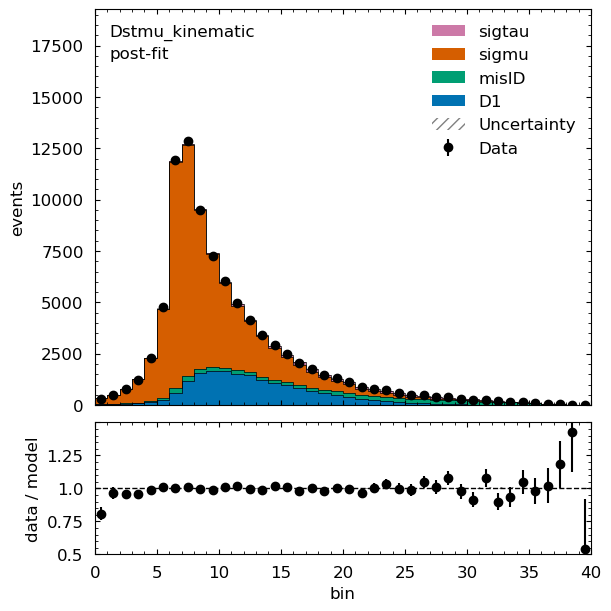

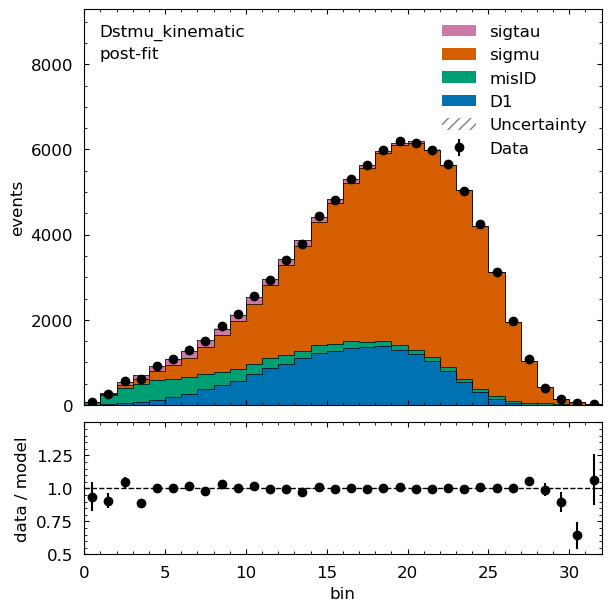

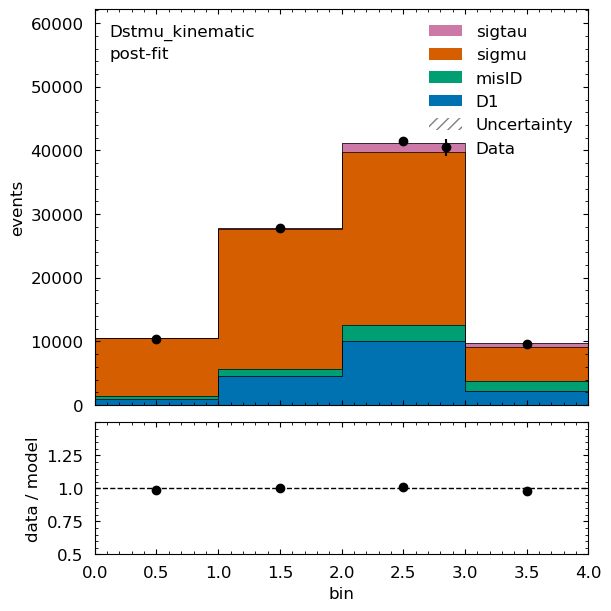

In [26]:
# Perform fit if requested
result = None
if config.doFit:
    result = perform_fit(workspace)

    if result is not None:

        # Generate plots
        visualise_fit_results(result, workspace, "results-pyhf")
        # generate_plots(workspace, result, config)
        pass
    else:
        print("Fit failed.")